<a href="https://colab.research.google.com/github/JarnovdKolk/Test/blob/main/Homework2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2, Parts C-E: Neural Network

In this Jupyter notebook, we will train a neural network on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam


# Load dataset
data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# =============================
# Problem C: Model with tanh activation and SGD optimizer
# =============================
inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='tanh')(inputs)
x = Dense(128, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8256 - loss: 0.3888 - val_accuracy: 0.8422 - val_loss: 0.3692
Epoch 2/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8457 - loss: 0.3585 - val_accuracy: 0.8439 - val_loss: 0.3539
Epoch 3/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8423 - loss: 0.3623 - val_accuracy: 0.8379 - val_loss: 0.3601
Epoch 4/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8319 - loss: 0.3793 - val_accuracy: 0.7765 - val_loss: 0.4707
Epoch 5/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8114 - loss: 0.4287 - val_accuracy: 0.8452 - val_loss: 0.3714
Epoch 6/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8251 - loss: 0.3901 - val_accuracy: 0.8312 - val_loss: 0.3891
Epoch 7/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8391 - loss: 0.3749 - val_accuracy: 0.8474 - val_loss: 0.4271
Epoch 8/50
813/813 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8177 - loss: 0.4270 - val_accuracy: 0.

NameError: name 'plot_roc' is not defined

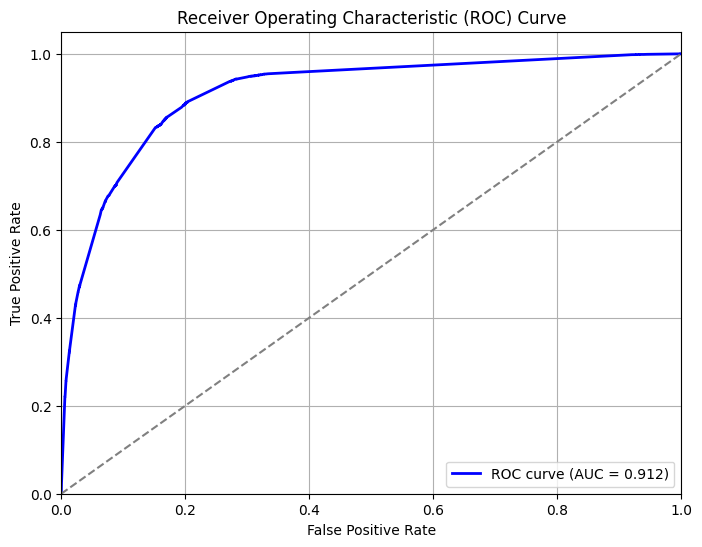

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# =============================
# Problem D: Model with ReLU activation and SGD optimizer
# =============================
inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, preds_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from roc_helper import plot_roc

plot_roc(y_test, preds_nn)

In [ ]:
# ==============================================
# TODO: Implement the Keras model instance
# as described in part D
# ==============================================
inputs = Input(shape=X_train.shape[1:])
outputs = ...
model = Model(inputs=inputs, outputs=outputs)

# ==============================================
# TODO: Compile the model with SGD and binary
# crossentropy loss
# ==============================================
model.compile(...)

# ==============================================
# TODO: Fit the training data for 50 epochs
# with a batch size of 128
# ==============================================
history = model.fit(...)

# retreieve predictions
preds_nn = model.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

# ==============================================
# TODO: Implement the scaler as described in
# part E
# ==============================================

# ==============================================
# TODO: Implement the Keras model instance
# as described in part E
# ==============================================
inputs = Input(shape=X_train.shape[1:])
outputs = ...
model = Model(inputs=inputs, outputs=outputs)

# ==============================================
# TODO: Compile the model with Adam and binary
# crossentropy loss
# ==============================================
model.compile(...)
history = model.fit(...)

preds_nn = model.predict(X_test)

In [ ]:
plot_roc(y_test, preds_nn)